In [2]:
import pandas as pd

In [11]:
data_info = pd.read_csv('lending_club_info.csv',index_col='LoanStatNew')

In [15]:
print(data_info.loc['revol_util']['Description'])

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [20]:
def feat_info(col):
    print(data_info.loc[col]['Description'])

In [21]:
feat_info('mort_acc')

Number of mortgage accounts.


In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
df = pd.read_csv('lending_club_loan_two.csv')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

# EDA

<Axes: xlabel='loan_status', ylabel='count'>

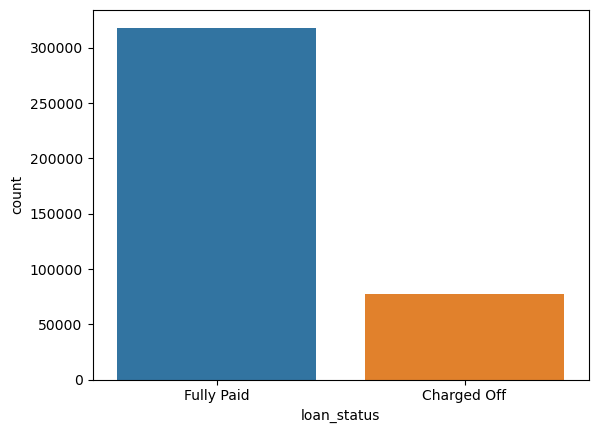

In [27]:
sns.countplot(x='loan_status',data = df)

<Axes: xlabel='loan_amnt', ylabel='Count'>

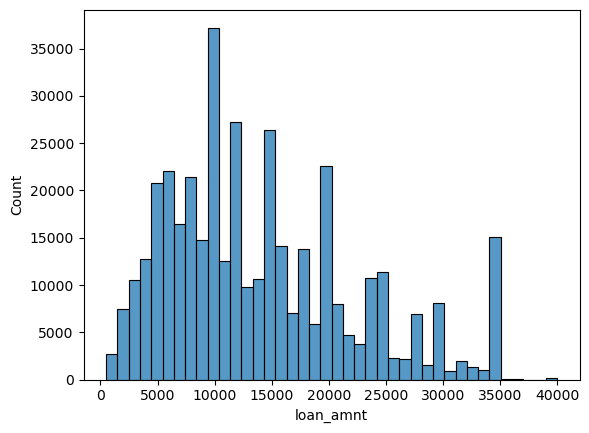

In [37]:
sns.histplot(data=df['loan_amnt'],bins=40)

In [39]:
df.corr(numeric_only=True)

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


<Axes: >

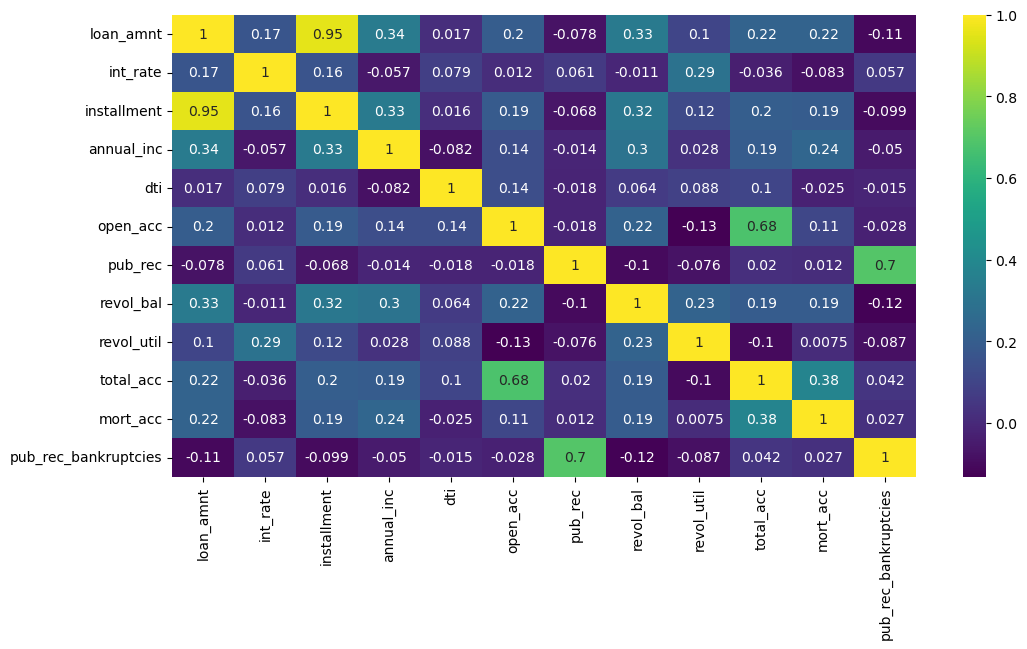

In [48]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='viridis')

<Axes: xlabel='installment', ylabel='loan_amnt'>

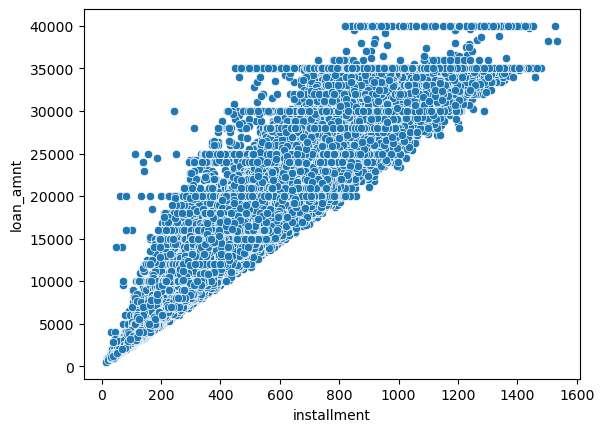

In [49]:
sns.scatterplot(x='installment',y='loan_amnt',data=df)

In [50]:
feat_info('installment')

The monthly payment owed by the borrower if the loan originates.


<Axes: xlabel='loan_status', ylabel='loan_amnt'>

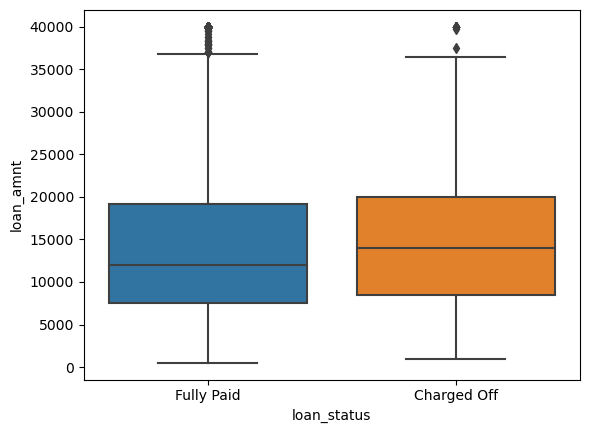

In [51]:
sns.boxplot(x='loan_status',y='loan_amnt',data=df)

In [53]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


In [56]:
df['grade'].unique()

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

In [57]:
df['sub_grade'].unique()

array(['B4', 'B5', 'B3', 'A2', 'C5', 'C3', 'A1', 'B2', 'C1', 'A5', 'E4',
       'A4', 'A3', 'D1', 'C2', 'B1', 'D3', 'D5', 'D2', 'E1', 'E2', 'E5',
       'F4', 'E3', 'D4', 'G1', 'F5', 'G2', 'C4', 'F1', 'F3', 'G5', 'G4',
       'F2', 'G3'], dtype=object)

<Axes: xlabel='grade', ylabel='count'>

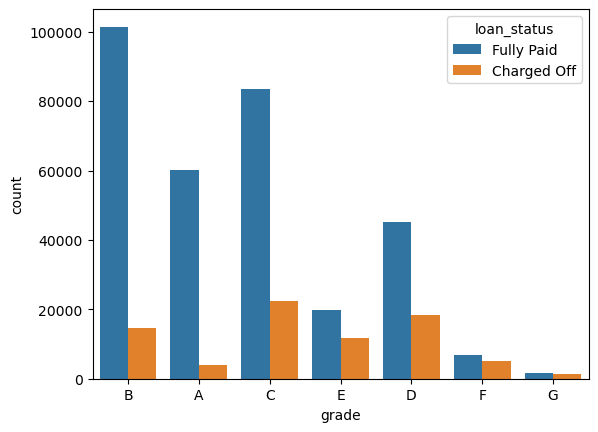

In [60]:
sns.countplot(x='grade',data=df,hue='loan_status')

<Axes: xlabel='sub_grade', ylabel='count'>

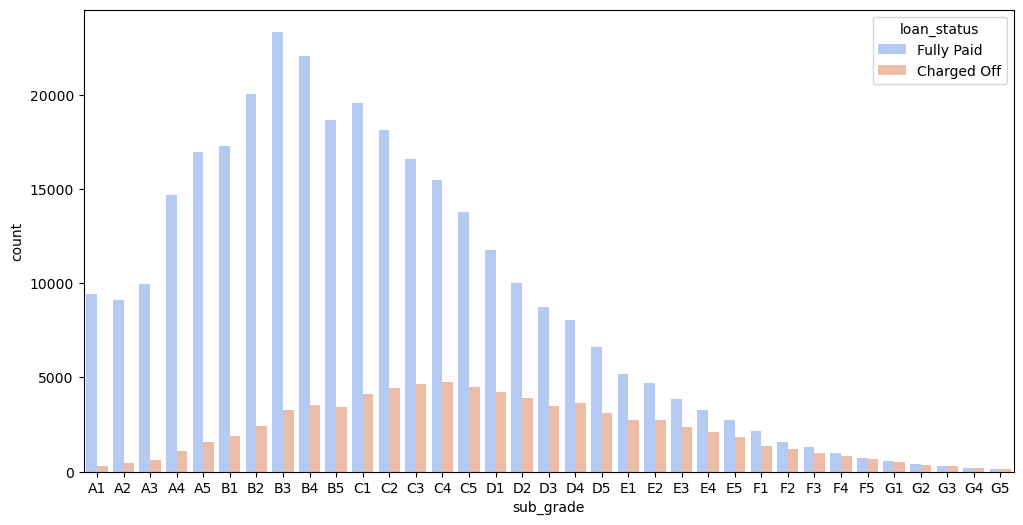

In [66]:
plt.figure(figsize=(12,6))
subgrade_order = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade',data=df,order=subgrade_order,hue= 'loan_status',palette='coolwarm')

<Axes: xlabel='sub_grade', ylabel='count'>

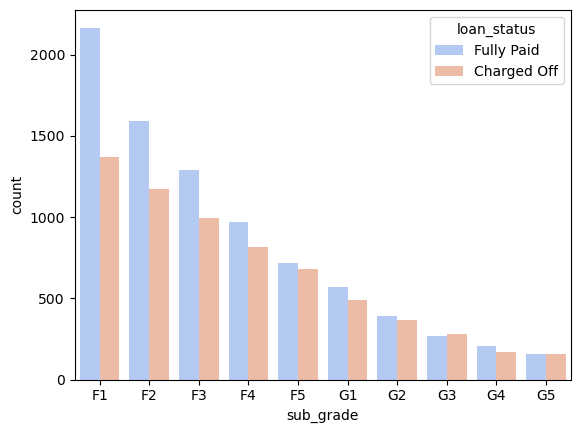

In [79]:
f_g = df[(df['grade']=='G') | (df['grade']=='F')]
subgrade_order = sorted(f_g['sub_grade'].unique())
sns.countplot(data= f_g ,x='sub_grade',order = subgrade_order,hue='loan_status',palette='coolwarm')

In [85]:
df['loan_repaid'] = df['loan_status'].map({'Fully Paid':1,'Charged Off':0})

In [87]:
df[['loan_repaid','loan_status']]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


<Axes: >

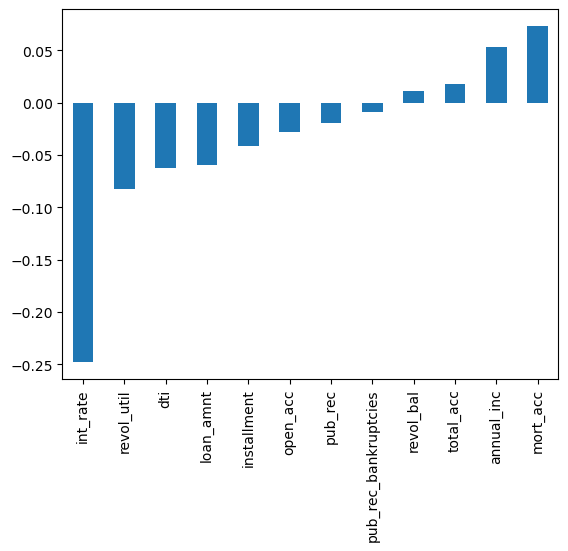

In [96]:
df.corr(numeric_only=True)['loan_repaid'].sort_values().drop('loan_repaid').plot(kind='bar')

# PreProcessing

In [97]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


In [99]:
len(df)

396030

In [102]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [103]:
100*df.isnull().sum() / len(df)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443401
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

In [104]:
feat_info('emp_title')

The job title supplied by the Borrower when applying for the loan.*


In [105]:
feat_info('emp_length')

Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


In [106]:
df['emp_title'].nunique()

173105

In [109]:
df['emp_title'].value_counts()

emp_title
Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
Postman                       1
McCarthy & Holthus, LLC       1
jp flooring                   1
Histology Technologist        1
Gracon Services, Inc          1
Name: count, Length: 173105, dtype: int64

In [110]:
df = df.drop('emp_title',axis=1)

In [117]:
emp_order = ['< 1 year','1 year','2 years','3 years','4 years','5 years','6 years','7 years','8 years','9 years','10+ years',]

<Axes: xlabel='emp_length', ylabel='count'>

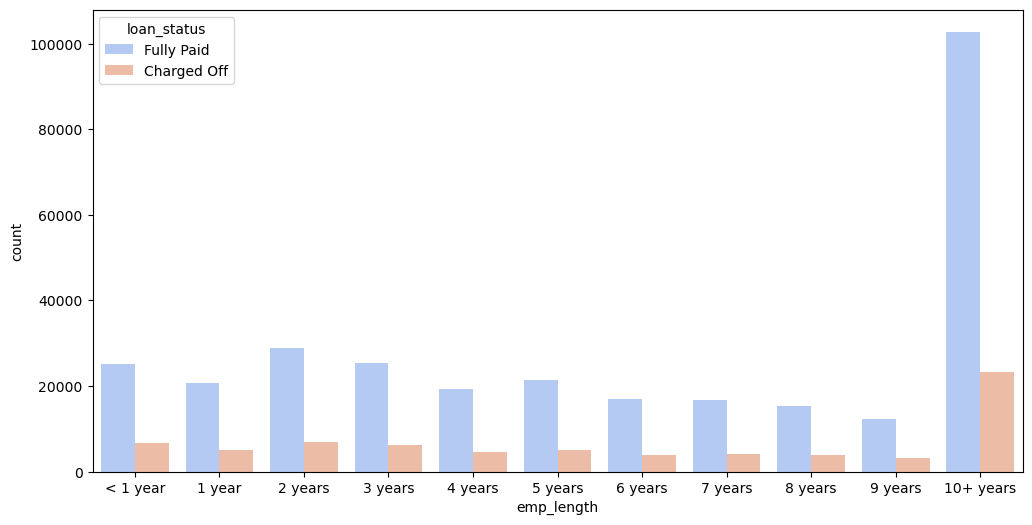

In [121]:
plt.figure(figsize=(12,6))
sns.countplot(x='emp_length',data = df,order=emp_order,hue='loan_status',palette='coolwarm')

In [130]:
emp_co = df[df['loan_status']=='Charged Off'].groupby('emp_length').count()['loan_status']

In [131]:
emp_fp = df[df['loan_status']=='Fully Paid'].groupby('emp_length').count()['loan_status']

In [133]:
emp_len = emp_co/(emp_co+emp_fp)

<Axes: xlabel='emp_length'>

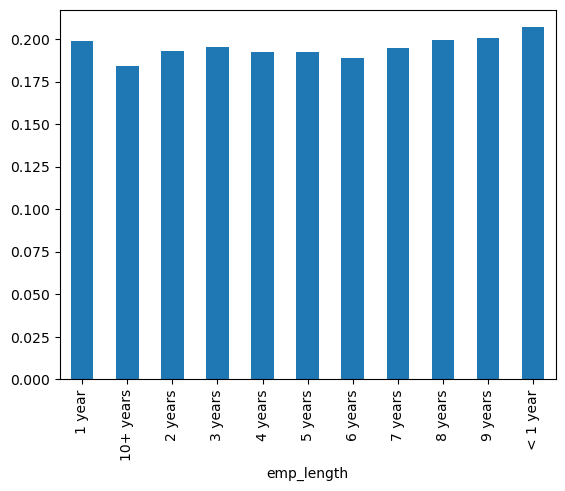

In [134]:
 emp_len.plot(kind='bar')

In [135]:
df = df.drop('emp_length',axis = 1)

In [137]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [138]:
df = df.drop('title',axis=1)

In [139]:
df['mort_acc'].value_counts()

mort_acc
0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: count, dtype: int64

In [144]:
df.corr(numeric_only=True)['mort_acc'].sort_values()

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

In [147]:
total_acc_avg = df.groupby('total_acc').mean(numeric_only=True)['mort_acc']

In [148]:
def fill_mort_acc(total_acc,mort_acc):
    
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return mort_acc

In [150]:
df['mort_acc'] = df.apply(lambda x: fill_mort_acc(x['total_acc'],x['mort_acc']),axis=1)

In [151]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

In [152]:
df = df.dropna()

In [153]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

In [156]:
df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [158]:
feat_info('term')

The number of payments on the loan. Values are in months and can be either 36 or 60.


In [159]:
df['term'].value_counts()

term
 36 months    301247
 60 months     93972
Name: count, dtype: int64

In [160]:
df['term'] = df['term'].apply(lambda x:int(x[:3]))

C:\Users\kevin\AppData\Local\Temp\ipykernel_15020\614074051.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['term'] = df['term'].apply(lambda x:int(x[:3]))


In [162]:
df['term'].value_counts()

term
36    301247
60     93972
Name: count, dtype: int64

In [163]:
df = df.drop('grade',axis=1)

In [165]:
dummies = pd.get_dummies(df['sub_grade'],drop_first=True)

df = pd.concat([df.drop('sub_grade',axis=1),dummies],axis=1)

In [168]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
       'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4',
       'G5'],
      dtype='object')

In [171]:
dummies = pd.get_dummies(df[['verification_status','application_type','initial_list_status','purpose']],drop_first=True)

df = pd.concat([df.drop(['verification_status','application_type','initial_list_status','purpose'],axis=1),dummies],axis=1)

In [175]:
df['home_ownership'].value_counts()

home_ownership
MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: count, dtype: int64

In [178]:
df['home_ownership'] = df['home_ownership'].replace(['NONE','ANY'],'OTHER')

In [179]:
df['home_ownership'].value_counts()

home_ownership
MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          142
Name: count, dtype: int64

In [180]:
dummies = pd.get_dummies(df['home_ownership'],drop_first=True)

df = pd.concat([df.drop('home_ownership',axis=1),dummies],axis=1)

In [183]:
df['zip_code'] = df['address'].apply(lambda x:x[-5:])

In [184]:
df['zip_code'].value_counts()

zip_code
70466    56880
22690    56413
30723    56402
48052    55811
00813    45725
29597    45393
05113    45300
11650    11210
93700    11126
86630    10959
Name: count, dtype: int64

In [185]:
dummies = pd.get_dummies(df['zip_code'],drop_first=True)

df = pd.concat([df.drop('zip_code',axis=1),dummies],axis=1)

In [186]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'issue_d',
       'loan_status', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'loan_repaid', 'A2', 'A3', 'A4',
       'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1',
       'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3',
       'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5',
       'verification_status_Source Verified', 'verification_status_Verified',
       'application_type_INDIVIDUAL', 'application_type_JOINT',
       'initial_list_status_w', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'OTH

In [187]:
df = df.drop('address',axis=1)

In [188]:
feat_info('issue_d')

The month which the loan was funded


In [189]:
df = df.drop('issue_d',axis=1)

In [190]:
feat_info('earliest_cr_line')

The month the borrower's earliest reported credit line was opened


In [193]:
df['earliest_cr_line'] = df['earliest_cr_line'].apply(lambda x:int(x[-4:]))

In [194]:
df['earliest_cr_line']

0         1990
1         2004
2         2007
3         2006
4         1999
          ... 
396025    2004
396026    2006
396027    1997
396028    1990
396029    1998
Name: earliest_cr_line, Length: 395219, dtype: int64

In [195]:
from sklearn.model_selection import train_test_split

In [196]:
df = df.drop('loan_status',axis=1)

In [197]:
X = df.drop('loan_repaid',axis=1).values
y = df['loan_repaid'].values

In [198]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [199]:
from sklearn.preprocessing import MinMaxScaler

In [202]:
scaler = MinMaxScaler()

In [203]:
X_train = scaler.fit_transform(X_train)

In [204]:
X_test = scaler.transform(X_test)

In [206]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [208]:
X_train.shape

(316175, 78)

In [209]:
model = Sequential()

model.add(Dense(78,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(39,activation='relu'))
model.add(Dropout(0.2))


model.add(Dense(19,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [211]:
model.fit(x=X_train,y=y_train,epochs=25,batch_size=256,validation_data=(X_test,y_test))

Epoch 1/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.3634 - val_loss: 0.2648
Epoch 2/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.2656 - val_loss: 0.2633
Epoch 3/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.2636 - val_loss: 0.2622
Epoch 4/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.2611 - val_loss: 0.2623
Epoch 5/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.2617 - val_loss: 0.2619
Epoch 6/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.2603 - val_loss: 0.2619
Epoch 7/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.2600 - val_loss: 0.2616
Epoch 8/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.2600 - val_loss: 0.2616
Epoch 9/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.2594 - val_loss: 0.2617
Epoch 10/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.2579 - val_loss: 0.2611
Epoch 11/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.2587 - val_loss: 0.2613
Epoch 12/25
1236/1236 ━━━━━━━━

# Evaluation

In [214]:
losses = pd.DataFrame(model.history.history)

<Axes: >

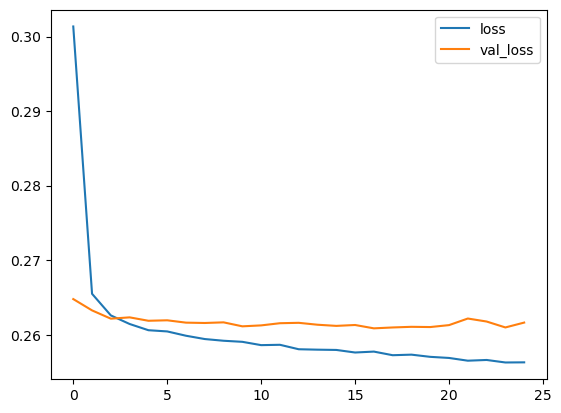

In [216]:
losses.plot()

In [217]:
from sklearn.metrics import classification_report,confusion_matrix

In [218]:
y_prob = model.predict(X_test)

2471/2471 ━━━━━━━━━━━━━━━━━━━━ 3s 999us/step


In [220]:
y_pred = (y_prob > 0.5)*1

In [222]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.43      0.60     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.93      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044



In [223]:
print(confusion_matrix(y_test,y_pred))

[[ 6808  8850]
 [   54 63332]]
